(-0.5, 767.5, 1023.5, -0.5)

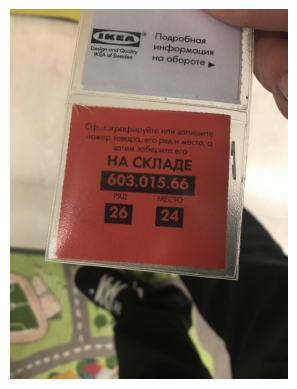

In [10]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

global img
img = cv2.imread("test_marker.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_orig = img.copy()

plt.imshow(img)
plt.axis('off')

(-0.5, 767.5, 1023.5, -0.5)

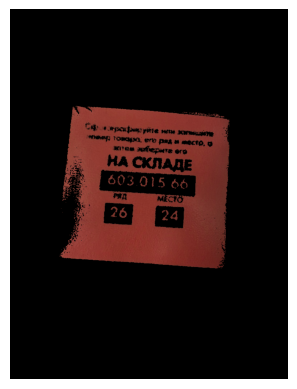

In [11]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

lower = np.array([0, 150, 100])
upper = np.array([5, 255, 255])
mask1 = cv2.inRange(img_hsv, lower, upper)

lower = np.array([175, 150, 100])
upper = np.array([180, 255, 255])
mask2 = cv2.inRange(img_hsv, lower, upper)

mask = mask1 | mask2

img_hsv = cv2.bitwise_and(img_hsv, img_hsv, mask=mask)
img = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

plt.imshow(img)
plt.axis('off')

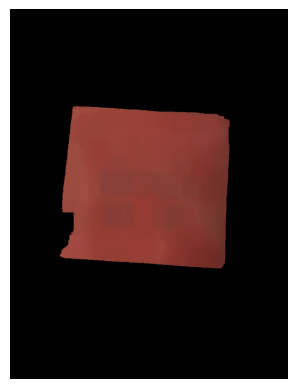

In [12]:
img_internal = img.copy()
kernel = np.ones((5, 5), np.uint8)
img_internal = cv2.dilate(img_internal, kernel, iterations=10)
img_internal = cv2.erode(img_internal, kernel, iterations=10)
plt.imshow(img_internal)
plt.axis('off')
img = img_internal

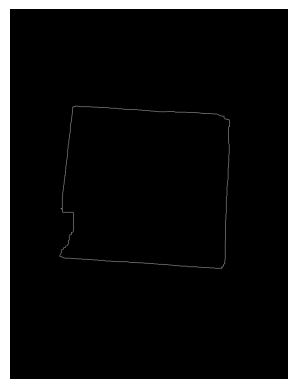

In [13]:

img_internal = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#@interact
def foo(T1=(0, 255, 1), T2= (0, 255, 1)):
    global img
    global img_internal
    img_internal1 = img_internal.copy()
    img_internal1 = cv2.Canny(img_internal1, 255, 150)
    plt.imshow(img_internal1, cmap='gray')
    plt.axis('off')
    img = img_internal1

foo()

(-0.5, 767.5, 1023.5, -0.5)

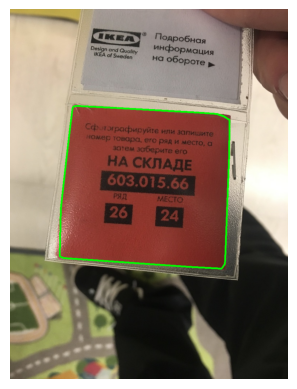

In [14]:
contours, hierarchy = cv2.findContours(img, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

hulls = []
for contour in contours:
    hull = cv2.convexHull(contour)
    hulls.append(hull)

img_conts = img_orig.copy()
cv2.drawContours(img_conts, hulls, -1, (0, 255, 0), 3)
plt.imshow(img_conts)
plt.axis('off')

(-0.5, 469.5, 450.5, -0.5)

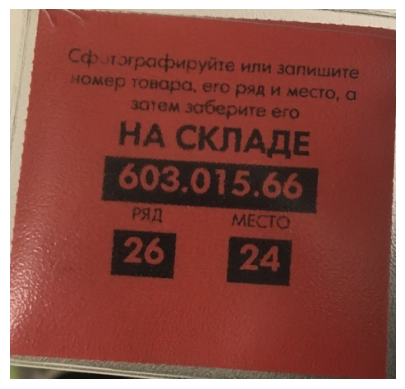

In [15]:
x, y, w, h = cv2.boundingRect(hulls[0])
img_marker = img_orig[y:y+h, x:x+w]

plt.imshow(img_marker)
plt.axis('off')

(-0.5, 469.5, 450.5, -0.5)

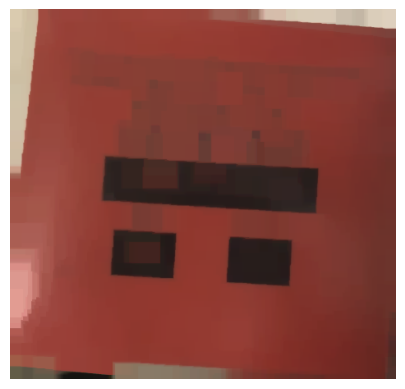

In [16]:
kernel = np.ones((5, 5), np.uint8)
# @interact
# def foo(I1=(1, 20, 1), I2= (1, 20, 1), O1=(1, 10, 1)):
img_cut = img_marker.copy()
img_cut = cv2.dilate(img_cut, kernel, iterations=2)
img_cut = cv2.erode(img_cut, kernel, iterations=8)
img_cut = cv2.dilate(img_cut, kernel, iterations=6)
plt.imshow(img_cut)
plt.axis('off')
# foo()

(-0.5, 469.5, 450.5, -0.5)

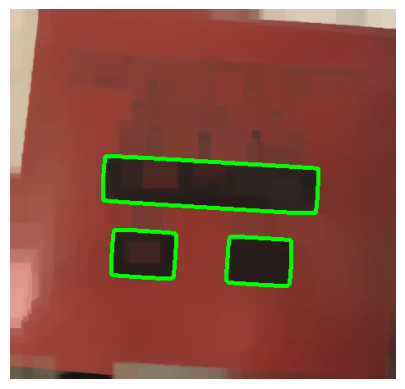

In [17]:
img_internal1 = cv2.cvtColor(img_cut, cv2.COLOR_RGB2GRAY)
img_internal1 = cv2.Canny(img_internal1, 150, 60)

contours, hierarchy = cv2.findContours(img_internal1, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

hulls = []
for contour in contours:
    hull = cv2.convexHull(contour)
    hulls.append(hull)

hulls = sorted(hulls, key=lambda x: len(x))[-3:]

img_conts = img_cut.copy()
cv2.drawContours(img_conts, hulls, -1, (0, 255, 0), 3)
plt.imshow(img_conts)
plt.axis('off')

In [18]:
import pytesseract
@interact
def foo(i=[1, 2, 3]):
    x, y, w, h = cv2.boundingRect(hulls[i - 1])
    img_final = img_marker[y:y+h, x:x+w]

    config = r'--oem 3 --psm 6'
    try:
        print("TEXT: " + pytesseract.image_to_string(img_final, lang='eng', config=config))
    except Exception as e:
        print(e)
    plt.imshow(img_final)
    plt.axis('off')

interactive(children=(Dropdown(description='i', options=(1, 2, 3), value=1), Output()), _dom_classes=('widget-…